In [56]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from pydub import AudioSegment

def mp3_to_samples(file_name,rate=None):
    """
    Returns
    samples, sample_rate: samples of the mp3 and the sample rate
    """
    return librosa.load(file_name,sr=rate)

def samples_to_freq(sample_arr):
    """
    Returns
    mag_arr: 2d array of magnitudes in frequency-time
    """
    freq_arr = librosa.stft(sample_arr)
    mag_arr = np.abs(freq_arr) # |z| = sqrt(k**2 + j**2) reduce complex component
    return mag_arr

def graph_spectro(freq_amp, rate,figsize=None,save_n=None):
    plt.subplots(figsize=figsize)
    librosa.display.specshow(librosa.amplitude_to_db(freq_amp, ref=np.max), sr=rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    if save_n:
        plt.savefig(save_n)
    plt.show()

def lazy_graph(file_name,figsize=None,save_n=None):
    samp,rate = mp3_to_samples(file_name)
    graph_spectro(samples_to_freq(samp),rate,figsize=figsize,save_n=save_n)

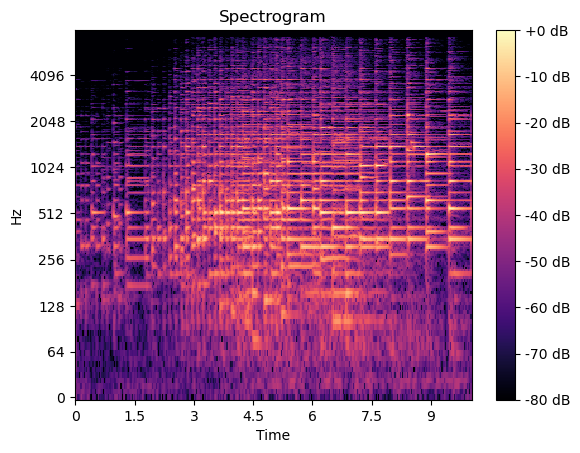

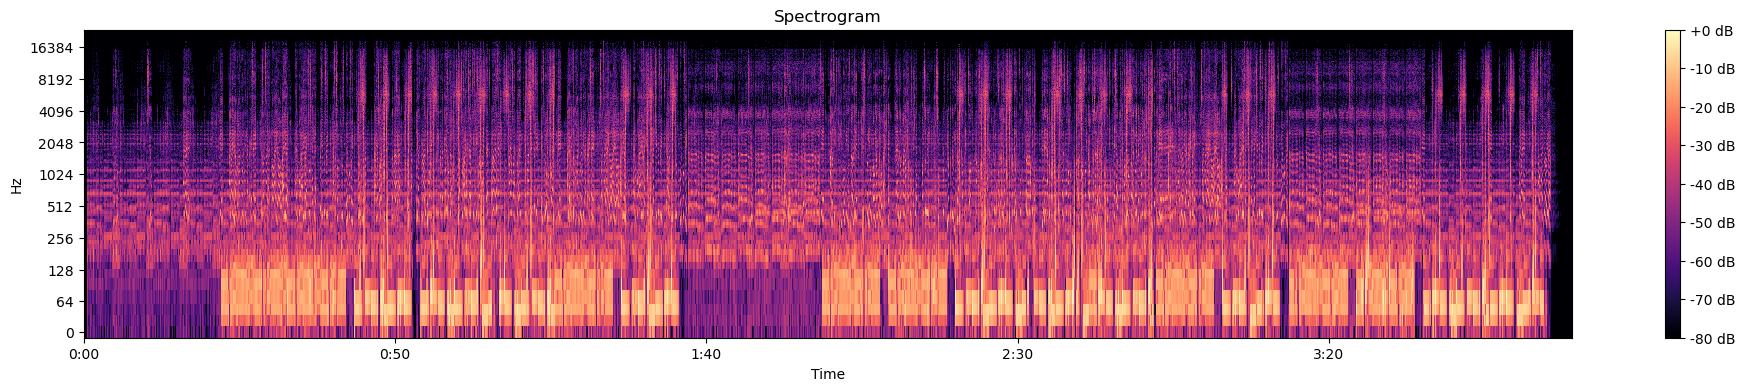

In [58]:
lazy_graph('samples/sample-4.mp3')
# lazy_graph('samples/sample-3.mp3')
# lazy_graph("samples/Bas - Tribe with J.Cole.mp3",figsize=(24,4),save_n='tribe_4x24.png')